<a href="https://colab.research.google.com/github/crossboww/Machine_Learning/blob/main/ML_learning/Supervised_Learning/Build_Linear_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Library's
import numpy as np

#Maths behind the LinearRegression

In [ ]:
#defining Regression Class..
class LinearRegression():
  #Initilizing the Parameters (Learning Rate and Number of Iterations)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):

    #Number of Training Example (m) and Features (n) Example
    self.m, self.n = X.shape

    #Initilize the Weight and Bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #Implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    self.Y_prediction = self.predict(self.X)

    #Gradient Decsent Calculations
    dw =  - (2 * (self.X.T).dot(self.Y - self.Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - self.Y_prediction) / self.m

    #Updating the Weights
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    return X.dot(self.w) + self.b

#Implementing the LinearRegression model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Data Pre-Processsing

In [ ]:
#Loading CSV file in Pandas DataFrame
salary_data = pd.read_csv('salary_data.csv')

In [ ]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.shape

(30, 2)

#Cheking For Missing values

In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


#Splitting the Features and Targets Values

In [ ]:
X = salary_data.drop(columns='Salary', axis=1)
Y = salary_data['Salary']

In [ ]:
print(X)

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


#Splitting the dataset into Training data and Testing data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=2)

#Training the LinearRegression Model

In [ ]:
model = LinearRegression(learning_rate = 0.01, no_of_iterations=500)

In [ ]:
model.fit(X_train,Y_train)

Printing Parameters values weight and bias

In [ ]:
print("weight = ",model.w[0])
print("bais = ",model.b)

weight =  9967.727542194507
bais =  20457.28682781222


/tmp/ipython-input-4079125322.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("weight = ",model.w[0])


#Predict the salary value for Test data

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

1      33415.332633
0      31421.787124
14     65312.060768
9      57337.878734
21     91228.152377
19     80263.652081
23    102192.652674
6      50360.469454
3      40392.741912
20     88237.834115
dtype: float64


Visualize the predicted values and actual vaues

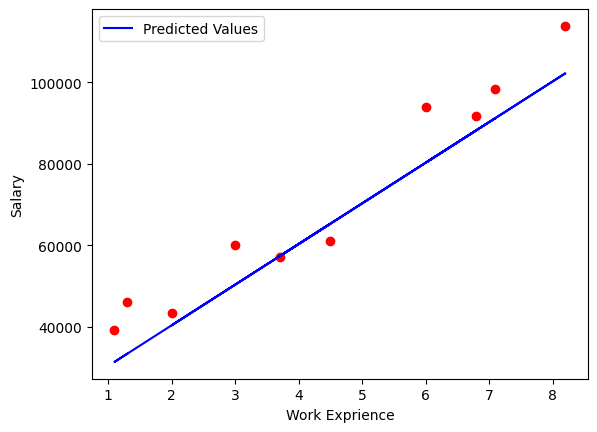

In [ ]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test,test_data_prediction,color='blue',label='Predicted Values')
plt.xlabel('Work Exprience')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse = mean_squared_error(Y_test, test_data_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, test_data_prediction)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MSE: 73357099.42124465
RMSE: 8564.875913943217
R² Score: 0.8837237175295211
